##Train Data set

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('train.csv')
df.shape


(1460, 81)

<Axes: >

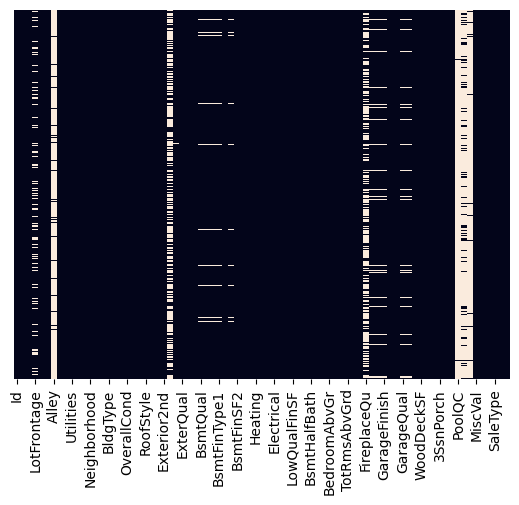

In [3]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#Replacing Missing Values


In [5]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [6]:
df.drop(['Alley'],axis=1,inplace=True)

In [7]:
df['MSZoning'].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [8]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df.drop(['GarageYrBlt'],axis=1,inplace=True)
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
df.drop(['Id'],axis=1,inplace=True)
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df.dropna(inplace=True)

<Axes: >

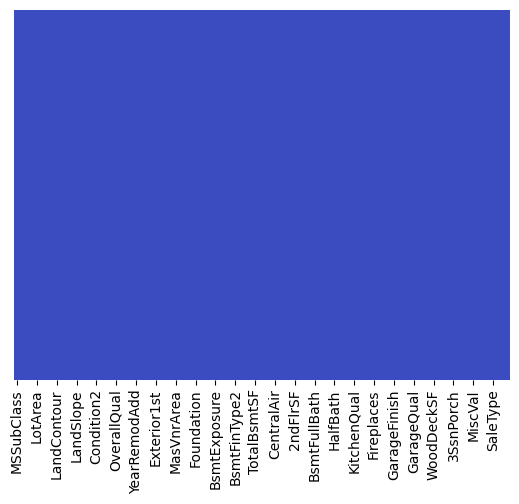

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [10]:
df.shape

(1422, 75)

#Categorical features

In [11]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
num_categorical_columns = len(categorical_columns)

print("Number of categorical columns:", num_categorical_columns)
print("Categorical columns:", categorical_columns)

Number of categorical columns: 39
Categorical columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [12]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:

        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)

        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:

            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1


    df_final=pd.concat([final_df,df_final],axis=1)

    return df_final

In [13]:
main_df=df.copy()
test_df=pd.read_csv('test1.csv')
test_df.shape

(1459, 74)

In [14]:
final_df=pd.concat([df,test_df],axis=0)
final_df=category_onehot_multcols(categorical_columns)
final_df =final_df.loc[:,~final_df.columns.duplicated()]

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [15]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]
df_Train.shape


(1422, 174)

In [16]:
df_Test.shape

(1459, 174)

In [17]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

#Prediciton and selecting the Algorithm


In [21]:
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'SalePrice']
df_selected = df.loc[:, features].copy()

# Combine full and half bathrooms using loc
df_selected.loc[:, 'TotalBaths'] = df_selected['FullBath'] + 0.5 * df_selected['HalfBath']
df_selected = df_selected.drop(['FullBath', 'HalfBath'], axis=1)
X = df_selected[['GrLivArea', 'BedroomAbvGr', 'TotalBaths']]
y = df_selected['SalePrice']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Print coefficients
print("\nCoefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")
print(f"Intercept: {model.intercept_}")

Mean Squared Error: 3301175238.808195
R-squared Score: 0.4412186107888072

Coefficients:
GrLivArea: 117.38616340610336
BedroomAbvGr: -29288.633147903056
TotalBaths: 21363.930418547796
Intercept: 52540.4874535273


In [27]:
def predict_house_price(sq_footage, bedrooms, bathrooms):
    features = pd.DataFrame([[sq_footage, bedrooms, bathrooms]],
                            columns=['GrLivArea', 'BedroomAbvGr', 'TotalBaths'])
    predicted_price = model.predict(features)
    return predicted_price[0]
sq_footage = 2000
bedrooms = 3
bathrooms = 2.5

predicted_price = predict_house_price(sq_footage, bedrooms, bathrooms)
print(f"\nPredicted price for a house with {sq_footage} sq ft, {bedrooms} bedrooms, and {bathrooms} bathrooms: ${predicted_price:.2f}")


Predicted price for a house with 2000 sq ft, 3 bedrooms, and 2.5 bathrooms: $252856.74
